In [1]:
import numpy as np
import pandas

In [2]:
#masukin data1
data1=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_herbs.csv', sep=',')
#masukin data2
data2=pandas.read_csv('D:\\SKRIPSI\\data\\data_praproses\\jamu_class.csv', sep=',')
data_1 = data1.drop('IDJamu',axis=1)
data_2 = data2.drop('Jamu ID',axis=1)
data_1['Kelas']=data_2['Class of Diseases']
X = data_1.drop('Kelas', axis=1).values
y = data_1['Kelas'].values

In [5]:
from sklearn.preprocessing import StandardScaler
# Membakukan fitur 
X = StandardScaler (). fit_transform (X)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pandas.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [8]:
final = pandas.concat([principalDf, data_1[['Kelas']]], axis = 1)

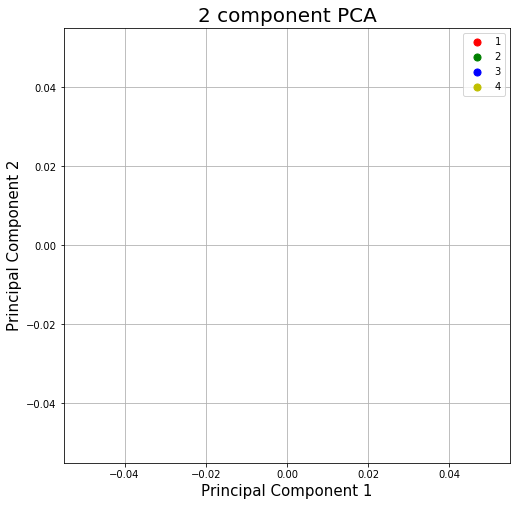

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
kelass = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18']
colors = ['r', 'g', 'b', 'y']
for Kelas, color in zip(kelass,colors):
    indicesToKeep = final['Kelas'] == Kelas
    ax.scatter(final.loc[indicesToKeep, 'principal component 1']
               , final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(kelass)
ax.grid()

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [19]:
#Scaling the values
X = scale(X)

In [21]:
pca = PCA(n_components=44)

pca.fit(X)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 1.32  2.49  3.4   4.3   5.17  6.03  6.84  7.62  8.39  9.13  9.87 10.56
 11.23 11.9  12.55 13.19 13.81 14.42 15.02 15.61 16.18 16.74 17.28 17.81
 18.33 18.85 19.35 19.84 20.33 20.82 21.3  21.78 22.25 22.72 23.19 23.65
 24.1  24.55 24.99 25.43 25.87 26.3  26.73 27.15]


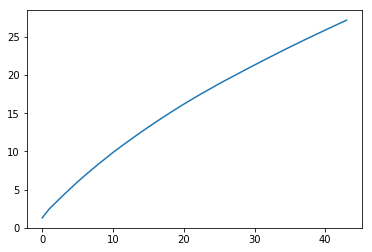

In [22]:
plt.plot(var1)

In [24]:
#Looking at above plot I'm taking 30 variables
pca = PCA(n_components=30)
pca.fit(X)
X1=pca.fit_transform(X)

print(X1)

[[-0.31264512  0.15096689  0.17079099 ... -0.27887197 -1.50701507
   0.51496099]
 [-0.53332186  0.24807949  0.27625949 ...  0.33750346 -3.11357677
   0.96486167]
 [-0.56427424  0.16524477 -0.53028963 ... -0.36671002 -1.38173347
   0.4921208 ]
 ...
 [-0.42277264  0.15661217 -0.25721488 ...  0.35057144 -1.94308614
  -0.29993116]
 [ 0.12760835 -0.10161632 -0.12239125 ... -0.16336542 -2.25159576
  -0.96885584]
 [-0.40552434  0.17938837 -0.05649397 ...  0.09426796 -2.047256
  -0.15760642]]
